# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 610


In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
city_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(city_url)
responseJson = response.json()
weather = responseJson["weather"][0]["description"]
print(json.dumps(responseJson, indent=4, sort_keys=True))
print(weather)


{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1682460530,
    "id": 2643743,
    "main": {
        "feels_like": 277.73,
        "humidity": 75,
        "pressure": 1019,
        "temp": 279.24,
        "temp_max": 280.98,
        "temp_min": 276.91
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2075535,
        "sunrise": 1682397876,
        "sunset": 1682449928,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 2.06
    }
}
overcast clouds


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
unit = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    response = requests.get(city_url)
    responseJson = response.json()
    print(json.dumps(responseJson, indent=4, sort_keys=True))
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = responseJson["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = responseJson["coord"]["lat"]
        city_lng = responseJson["coord"]["lon"]
        city_max_temp = responseJson["main"]["temp_max"]
        city_humidity = responseJson["main"]["humidity"]
        city_clouds = responseJson["clouds"]["all"]
        city_wind = responseJson["wind"]["speed"]
        city_country = responseJson["sys"]["country"]
        city_date = responseJson["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
{
    "base": "stations",
    "clouds": {
        "all": 57
    },
    "cod": 200,
    "coord": {
        "lat": 25.5198,
        "lon": 90.2201
    },
    "dt": 1682460809,
    "id": 1254046,
    "main": {
        "feels_like": 22.2,
        "grnd_level": 966,
        "humidity": 44,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 22.72,
        "temp_max": 22.72,
        "temp_min": 22.72
    },
    "name": "Tura",
    "sys": {
        "country": "IN",
        "sunrise": 1682465224,
        "sunset": 1682512000
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 79,
        "gust": 1.01,
        "speed": 1
    }
}
Processing Record 1 of Set 1 | tura
{
    "base": "stations",
    "clouds": {
        "all": 100

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [18]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,22.72,44,57,1.00,IN,1682460809
1,port lincoln,-34.7333,135.8667,20.72,54,100,6.45,AU,1682460809
2,waitangi,-43.9535,-176.5597,11.57,91,100,1.79,NZ,1682460655
3,cape canaveral,28.4058,-80.6048,24.49,80,29,4.14,US,1682460810
4,lautoka,-17.6167,177.4667,28.92,61,20,1.54,FJ,1682460810


In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,22.72,44,57,1.00,IN,1682460809
1,port lincoln,-34.7333,135.8667,20.72,54,100,6.45,AU,1682460809
2,waitangi,-43.9535,-176.5597,11.57,91,100,1.79,NZ,1682460655
3,cape canaveral,28.4058,-80.6048,24.49,80,29,4.14,US,1682460810
4,lautoka,-17.6167,177.4667,28.92,61,20,1.54,FJ,1682460810


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,22.72,44,57,1.00,IN,1682460809
1,port lincoln,-34.7333,135.8667,20.72,54,100,6.45,AU,1682460809
2,waitangi,-43.9535,-176.5597,11.57,91,100,1.79,NZ,1682460655
3,cape canaveral,28.4058,-80.6048,24.49,80,29,4.14,US,1682460810
4,lautoka,-17.6167,177.4667,28.92,61,20,1.54,FJ,1682460810


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

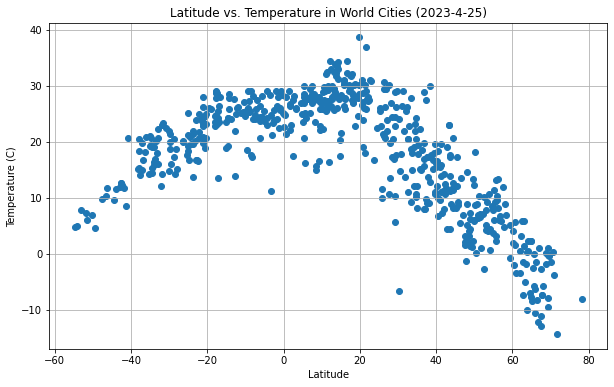

In [22]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature in World Cities (2023-4-25)")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [23]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,22.72,44,57,1.00,IN,1682460809
1,port lincoln,-34.7333,135.8667,20.72,54,100,6.45,AU,1682460809
2,waitangi,-43.9535,-176.5597,11.57,91,100,1.79,NZ,1682460655
3,cape canaveral,28.4058,-80.6048,24.49,80,29,4.14,US,1682460810
4,lautoka,-17.6167,177.4667,28.92,61,20,1.54,FJ,1682460810
...,...,...,...,...,...,...,...,...,...
581,balabac,7.9868,117.0645,27.48,80,100,3.80,PH,1682460882
582,weno,7.4515,151.8468,29.97,79,100,4.12,FM,1682460882
583,nadi,-17.8000,177.4167,29.00,61,20,1.54,FJ,1682460805


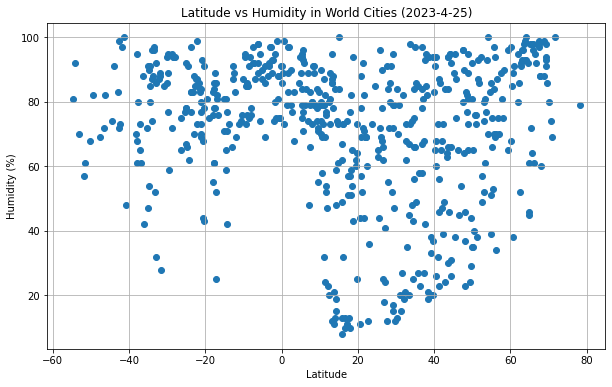

In [24]:
# Build scatter plot for latitude vs. Humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity in World Cities (2023-4-25)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [25]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,22.72,44,57,1.00,IN,1682460809
1,port lincoln,-34.7333,135.8667,20.72,54,100,6.45,AU,1682460809
2,waitangi,-43.9535,-176.5597,11.57,91,100,1.79,NZ,1682460655
3,cape canaveral,28.4058,-80.6048,24.49,80,29,4.14,US,1682460810
4,lautoka,-17.6167,177.4667,28.92,61,20,1.54,FJ,1682460810
...,...,...,...,...,...,...,...,...,...
581,balabac,7.9868,117.0645,27.48,80,100,3.80,PH,1682460882
582,weno,7.4515,151.8468,29.97,79,100,4.12,FM,1682460882
583,nadi,-17.8000,177.4167,29.00,61,20,1.54,FJ,1682460805


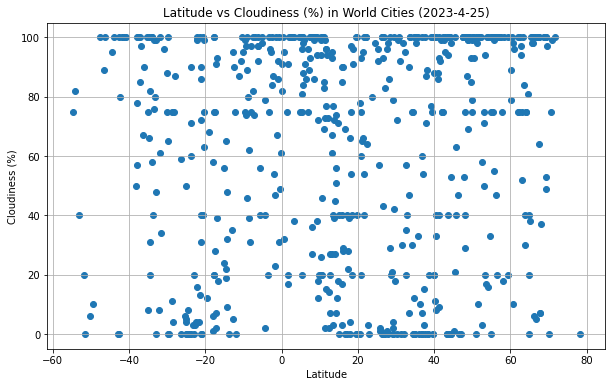

In [26]:
# Build scatter plot for latitude vs. Cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (%) in World Cities (2023-4-25)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [27]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,22.72,44,57,1.00,IN,1682460809
1,port lincoln,-34.7333,135.8667,20.72,54,100,6.45,AU,1682460809
2,waitangi,-43.9535,-176.5597,11.57,91,100,1.79,NZ,1682460655
3,cape canaveral,28.4058,-80.6048,24.49,80,29,4.14,US,1682460810
4,lautoka,-17.6167,177.4667,28.92,61,20,1.54,FJ,1682460810
...,...,...,...,...,...,...,...,...,...
581,balabac,7.9868,117.0645,27.48,80,100,3.80,PH,1682460882
582,weno,7.4515,151.8468,29.97,79,100,4.12,FM,1682460882
583,nadi,-17.8000,177.4167,29.00,61,20,1.54,FJ,1682460805


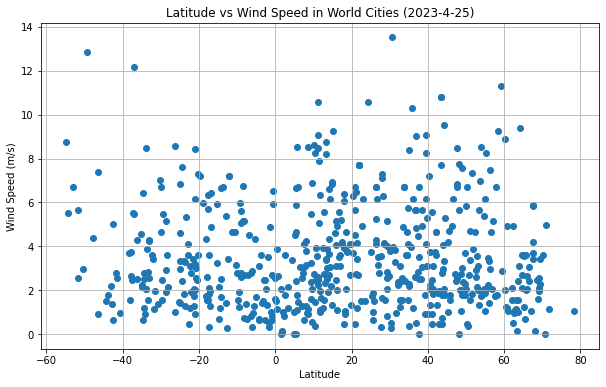

In [28]:
# Build scatter plot for latitude vs. Cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed in World Cities (2023-4-25)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def ld(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.scatter(x, y)
    plt.plot(x ,regress_values,"r-")
    plt.annotate(line_eq,(x[0],y[0]),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    

In [30]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]
northern_hemi_df.reset_index(inplace=True, drop=True)
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,22.72,44,57,1.00,IN,1682460809
1,cape canaveral,28.4058,-80.6048,24.49,80,29,4.14,US,1682460810
2,wailua homesteads,22.0669,-159.3780,27.24,69,100,7.72,US,1682460810
3,carbonear,47.7332,-53.2148,2.35,90,100,6.84,CA,1682460810
4,anadyr,64.7500,177.4833,-7.72,61,0,2.68,RU,1682460810


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]
southern_hemi_df.reset_index(inplace=True, drop=True)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port lincoln,-34.7333,135.8667,20.72,54,100,6.45,AU,1682460809
1,waitangi,-43.9535,-176.5597,11.57,91,100,1.79,NZ,1682460655
2,lautoka,-17.6167,177.4667,28.92,61,20,1.54,FJ,1682460810
3,margaret river,-33.9500,115.0667,15.87,74,100,8.46,AU,1682460810
4,blackmans bay,-43.0167,147.3167,11.96,83,0,2.18,AU,1682460810


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7617370499030226


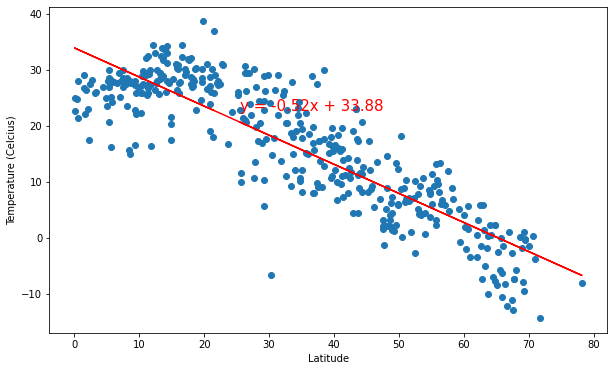

In [32]:
ld(northern_hemi_df.Lat, northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celcius)")
plt.show()

The r-squared is: 0.6113356295146973


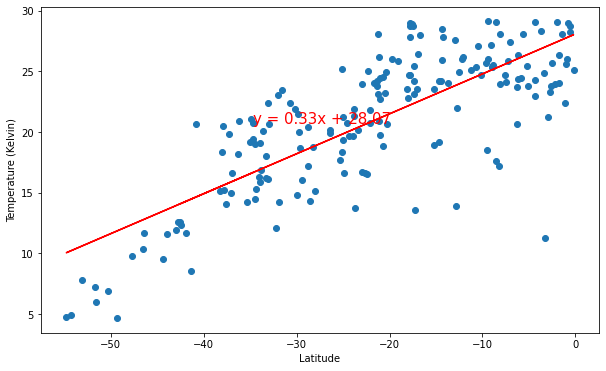

In [33]:
# Linear regression on Southern Hemisphere
ld(southern_hemi_df.Lat, southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (Kelvin)")
plt.show()

# Discussion Regarding Latitude vs. Temperature:
The first graph shows that temperature decreases alongside the angular distance from the world's equator; the second graph shows a similar relationship, with tempetatures decreasing as the angular distance from the world's equator increases. From the data we can surmise that cities along the equator have higher max temperatures, whereas cities further from the equator see lower max temperatures. The Pearson's value of .76 and .55 for Northern and Southern hemisphere cities respectively reinforce this observation. 


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.02093427291757637


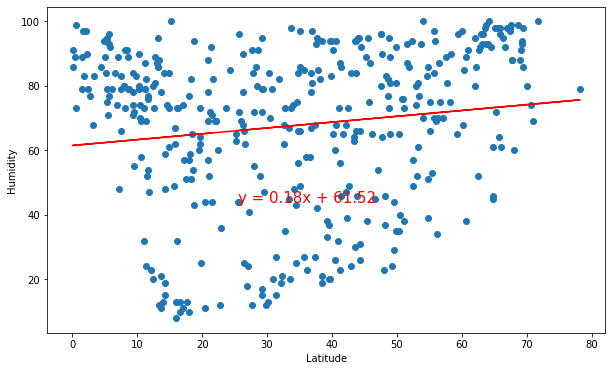

In [34]:
# Northern Hemisphere
ld(northern_hemi_df.Lat, northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-squared is: 0.041425632246250316


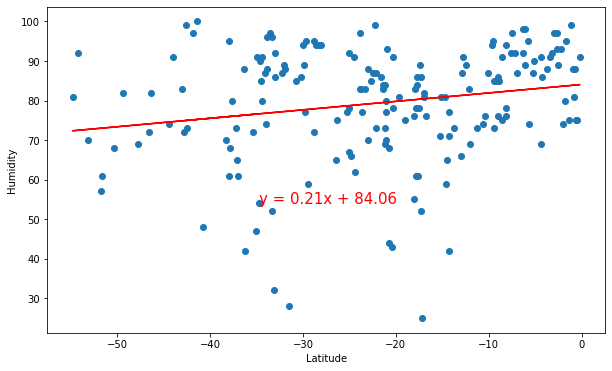

In [35]:
# Southern Hemisphere
ld(southern_hemi_df.Lat, southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()


**Discussion about the linear relationship:** 
The linear regression line is relatively flat, with low r-values. There is no significant relationship that we can gleam from the data provided in regards to latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.003832316109685626


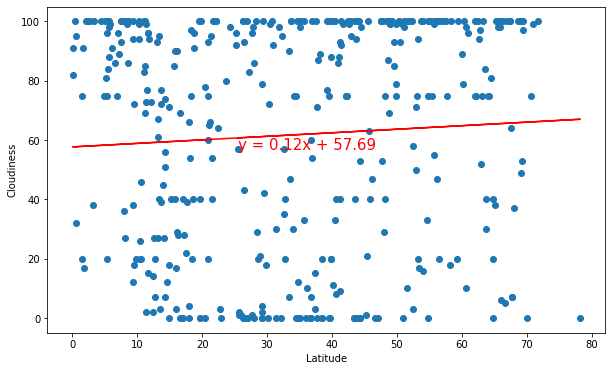

In [36]:
ld(northern_hemi_df.Lat, northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-squared is: 0.004497284526678861


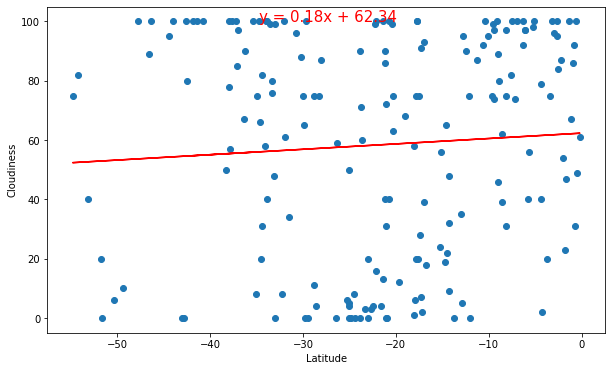

In [37]:
ld(southern_hemi_df.Lat, southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** Much like the linear relationship between latitude and humidity. The lines are flat and Pearson's value is close to 0, showing no mathematical correlation between the two variables. From the data it would seem that latitude has no bearing on the cloudiness of a city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0013964528341550314


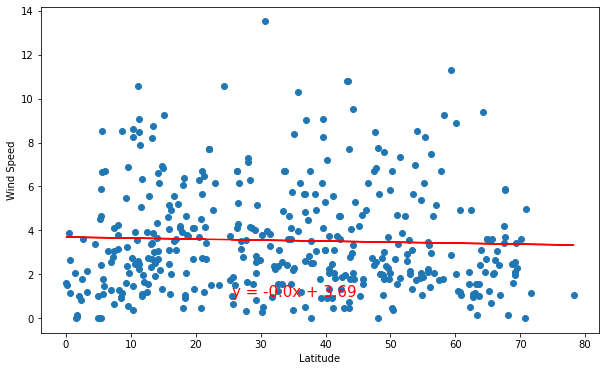

In [38]:
ld(northern_hemi_df.Lat, northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-squared is: 0.04417498040536591


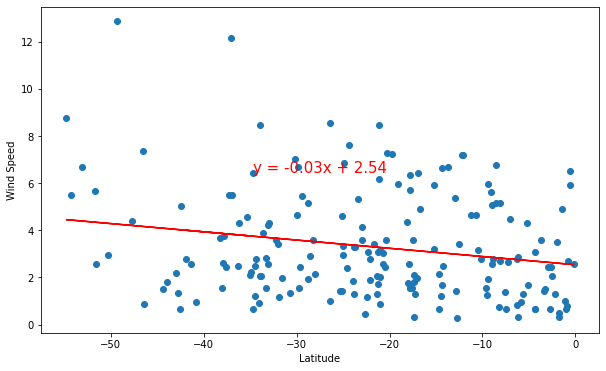

In [39]:
ld(southern_hemi_df.Lat, southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 
In the first graph we see a flat line and a low r-value, whereas the second graph has an observable incline but also a low r-value. There maybe be some minor correlation regarding distance from equator and windpseed in the Southern Hemisphere, but it could also be chance. 

Ultimately this dataset is limited due to it only being a snapshot of global weather. There could be some meaningful relationship regarding latitude and humidity, cloudiness and wind speed but it is difficult to observe from our limited data set. 